In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import math
%matplotlib inline

In [ ]:
X = np.loadtxt('/content/drive/MyDrive/ML IITD/ass1/Q4/q4x.dat')
print(X[1:6])

[[131. 355.]
 [105. 469.]
 [ 86. 506.]
 [ 99. 402.]
 [ 87. 423.]]


In [ ]:
Y = np.loadtxt('/content/drive/MyDrive/ML IITD/ass1/Q4/q4y.dat', dtype=str).reshape(-1,1)
print(Y)

[['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Alaska']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['Canada']
 ['C

In [ ]:
m=X.shape[0]

In [ ]:
#Normalization of the Input X using the z-score formula. We subtract the mean from every X and then divide it by std deviation of the distribution. 
mean = np.mean(X, axis=0).reshape(1,-1)
std_dev = np.std(X, axis=0).reshape(1,-1) 
X-= mean 
X/= std_dev  
#used the z score method first computed the sum of (x-mean) for all the values
#then divided it by std deviation for all values 
print("Mean after normalization: ",np.mean(X), "\n Standard deviation after normalization:",np.std(X))

Mean after normalization:  1.1102230246251565e-16 
 Standard deviation after normalization: 0.9999999999999999


In [ ]:
#define the classes 
Y[Y=='Alaska']=1
Y[Y=='Canada']=0
#  phi= sum of (y^i)/m 
phi = np.sum([Y=='1'])/m
#Will save these classes in different arrays
x0=[i for i in range(len(Y)) if Y[i]=='0'] #canada
x1=[i for i in range(len(Y)) if Y[i]=='1'] #alaska 
#the mean of b0th the classes
mu0 = (np.mean(X[x0], axis=0)).reshape(1,-1)
mu1 = (np.mean(X[x1], axis=0)).reshape(1,-1)

In [ ]:
#Since it is a binary classifier, we learn two different normal distributions for the two classes with different means and covariance. If the covariance for both the
#classes is same, then we get a linear decision boundary otherwise we get a quadratic decision boundary.
#Here we are considering that the covariance is same of these 2 classes, so we assume in this case that the means are also same for both the classes 
def covariance(X, mu0, mu1, Y, flag):
  # we initliaze cov as matrix as a 2x2 zero matrix 
    cov=np.zeros((2,2)) #combine cov of class 1 and 0
    cov0=np.zeros((2,2)) #to store the covariance of the class 0
    cov1=np.zeros((2,2)) #to store the covariance of the class 1
    m = len(X)
    class1_count=0; class0_count=0 #to keep the count of number of elements in class 1 and 0 
    for i in range(m):
        if(Y[i]=='1'):
            cov1+=np.dot((X[i:i+1]-mu1).T, (X[i:i+1]-mu1))   # cov= (x-mu)^T.(x-mu)/m 
            class1_count+=1 #as the cov1 updates the class1_counter updates too 
        else:
            cov0+=np.dot((X[i:i+1]-mu0).T, (X[i:i+1]-mu0))   # cov= (x-mu)^T.(x-mu)/m 
            class0_count+=1 #as the cov0 updates the class0_counter updates too 
    cov=(cov0+cov1)/m
    cov0/=class0_count
    cov1/=class1_count
    if (flag==2): return cov
    if (flag==1): return cov1
    else: return cov0

cov = covariance(X, mu0, mu1, Y, 2)

In [ ]:
print("PHI for class='Alaska' is={}".format(phi))
print("Mean of the Distribution for Alaska={}".format(mu1))
print("Mean of the Distribution for Canada={}".format(mu0))
print("The value of the covariance matrix is = \n{}".format(cov))

PHI for class='Alaska' is=0.5
Mean of the Distribution for Alaska=[[-0.75529433  0.68509431]]
Mean of the Distribution for Canada=[[ 0.75529433 -0.68509431]]
The value of the covariance matrix is = 
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


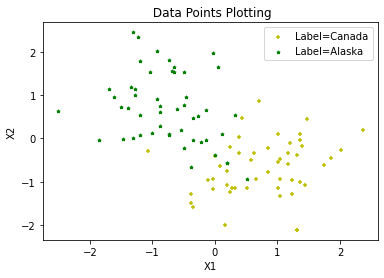

In [ ]:
#plot the data points
plt.figure(1)
colors=['y' if l=='0' else 'g' for l in Y] #label y= canada, green= alaska 
plt.scatter(X[x0][:,0], X[x0][:,1], s = 10, marker='+', c='y',label='Label=Canada')
plt.scatter(X[x1][:,0], X[x1][:,1], s = 10, marker='*', c='g',label='Label=Alaska')
plt.title(' Data Points Plotting')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [ ]:
#we will define the linear parameters needed to calculate the descison boundary and generate our data valuw with these cov and means values 
##https://towardsdatascience.com/gaussian-discriminant-analysis-an-example-of-generative-learning-algorithms-2e336ba7aa5c
cov_inv = np.linalg.inv(cov)
temp = math.log(phi/(1-phi)) 
c = (1/2)*((np.dot(np.dot(mu1, cov_inv), mu1.T)) - (np.dot(np.dot(mu0, cov_inv), mu0.T))) 
m = np.dot(cov_inv, (mu1-mu0).T)   
x_values = np.array([np.min(X[:, 1] -1 ), np.max(X[:, 1] +1 )]).reshape(1,-1) #value of x features
y = np.dot((-1./m[0:1]),np.dot(m[1:2], x_values)) - c

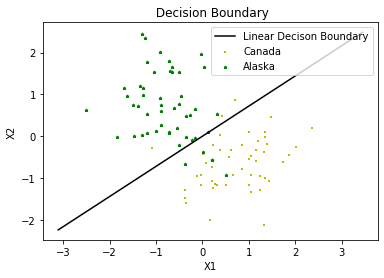

In [ ]:
#Plotting the linear boundary
#If the covariance for both the classes is same, then we get a linear decision boundary
plt.figure(1)
colors=['y' if l=='0' else 'g' for l in Y]
plt.scatter(X[x0][:,0], X[x0][:,1], s = 8, marker='+', c='y',label='Canada')
plt.scatter(X[x1][:,0], X[x1][:,1], s = 8, marker='*', c='g',label='Alaska')
plt.title(' Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x_values.ravel(), y.ravel(), c='k',label='Linear Decison Boundary')
plt.legend()
plt.show(block=False)

In [ ]:
# for Separate Covariance Matrices the linear separator becomes quadratic
cov0 = covariance(X, mu0, mu1, Y, 0) #now we have to calculate each of them separately 
cov1 = covariance(X, mu0, mu1, Y, 1)
print("The value of the covariance matrix for label='Alaska' is = \n{}".format(cov1))
print("The value of the covariance matrix for label='Canada' is = \n{}".format(cov0))

The value of the covariance matrix for label='Alaska' is = 
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
The value of the covariance matrix for label='Canada' is = 
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


In [ ]:
# to generate the equation for the quadratic boundary separating the two regions we will define these parameters 
cov0_inv = np.linalg.inv(cov0)
cov1_inv = np.linalg.inv(cov1)
cov0_det = np.linalg.det(cov0)  #  to compute the determinant of the given square array
cov1_det = np.linalg.det(cov1)
temp = math.log(phi/(1-phi))
#therse are directly imputed in the quadratic decison boundary formula 
a = cov1_inv - cov0_inv
b = 2* (np.dot(cov1_inv, mu1.T) - np.dot(cov0_inv,mu0.T))
d = np.dot(np.dot(mu1, cov1_inv),mu1.T) - np.dot(np.dot(mu0, cov0_inv),mu0.T)- math.log(cov0_det/cov1_det)

In [ ]:
x1_val= np.linspace((np.min(X[:,1])-1), (np.max(X[:,1])+1), 100) #generating values for X axis where feature X1 is placed 
c1 = a[1,1]
x2_val = [] 
for i in range(len(x1_val)):
    temp2 = (a[0,0]*(x1_val[i]**2)) - (b[0,0]*x1_val[i]) + d[0,0] #quadratic equation of order 2 
    temp3 = ((a[0,1]+a[1,0])*x1_val[i]) - b[1,0]  #linear eqaution
    x2_val.append(np.roots([c1, temp3, temp2]))  # contains roots of the quadratic and linear separator equations 

y_theta0= [(x2_val[i][0]) for i in range(len(x2_val))] #storing the theta for feature 0
y_theta1= [(x2_val[i][1]) for i in range(len(x2_val))] # storing the theta for feature 1

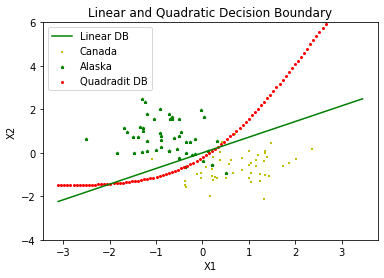

In [ ]:
#plotting of the qudratic decision boundary 
plt.figure(2)
plt.scatter(X[x0][:,0], X[x0][:,1], s = 8, marker='+', c='y',label='Canada')
plt.scatter(X[x1][:,0], X[x1][:,1], s = 8, marker='*', c='g',label='Alaska')
plt.plot(x_values.ravel(), y.ravel(), c='g',label='Linear DB')
plt.title('Linear and Quadratic Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(x1_val,y_theta0, c='r',s=4,label='Quadradit DB')  #to generate quadratic boundary using theta and x
plt.scatter(x1_val,y_theta1, c='r',s=4,label='')
plt.ylim(bottom=-4)
plt.ylim(top=6)
plt.legend()
plt.show()